# **Sentiment Analysis**

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## **Step 1**: Load and Explore the Dataset

In [14]:
df = pd.read_csv('/content/sentiment_dataset.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nSentiment Value Counts:")
print(df['Sentiment'].value_counts())

Dataset Shape: (732, 15)

First few rows:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                         

## **Step 2**: Data Preprocessing

In [15]:
# Initialize NLP tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

def preprocess_text(text):
    """
    Comprehensive text preprocessing function
    """
    if pd.isna(text):
        return ""

    text = str(text).lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and short tokens
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

print("Preprocessing text data...")
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

print("\nOriginal vs Cleaned Text Examples:")
for i in range(3):
    print(f"Original: {df['Text'].iloc[i][:100]}...")
    print(f"Cleaned: {df['Cleaned_Text'].iloc[i]}")
    print("-" * 50)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Preprocessing text data...

Original vs Cleaned Text Examples:
Original:  Enjoying a beautiful day at the park!              ...
Cleaned: enjoying beautiful day park
--------------------------------------------------
Original:  Traffic was terrible this morning.                 ...
Cleaned: traffic terrible morning
--------------------------------------------------
Original:  Just finished an amazing workout! 💪               ...
Cleaned: finished amazing workout
--------------------------------------------------


## **Step 3**: Sentiment Analysis using TextBlob

In [16]:
def analyze_sentiment_textblob(text):
    """
    Analyze sentiment using TextBlob
    Returns: sentiment label (Positive, Negative, Neutral)
    """
    if not text or text.strip() == "":
        return "Neutral"

    analysis = TextBlob(text)

    # TextBlob polarity between -1 and 1
    polarity = analysis.sentiment.polarity

    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

print("Performing sentiment analysis with TextBlob...")
df['TextBlob_Sentiment'] = df['Cleaned_Text'].apply(analyze_sentiment_textblob)

print("\nSentiment Analysis Results:")
print(df['TextBlob_Sentiment'].value_counts())

Performing sentiment analysis with TextBlob...

Sentiment Analysis Results:
TextBlob_Sentiment
Neutral     401
Positive    245
Negative     86
Name: count, dtype: int64


## **Step 4**: Compare Sentiment with Ground Truth

In [17]:
if 'Sentiment' in df.columns:
    print("\nComparison with Original Sentiment Labels:")
    comparison = pd.crosstab(df['Sentiment'], df['TextBlob_Sentiment'])
    print(comparison)

    # Calculate accuracy with ground truth
    accuracy = (df['Sentiment'] == df['TextBlob_Sentiment']).mean()
    print(f"\nAccuracy compared to original labels: {accuracy:.2%}")


Comparison with Original Sentiment Labels:
TextBlob_Sentiment  Negative  Neutral  Positive
Sentiment                                      
Acceptance                 1        2         0
Acceptance                 1        3         1
Accomplishment             0        0         3
Admiration                 0        0         1
Admiration                 0        1         1
...                      ...      ...       ...
Wonder                     0        1         0
Wonder                     0        1         0
Wonderment                 0        1         0
Yearning                   1        1         0
Zest                       0        0         2

[279 rows x 3 columns]

Accuracy compared to original labels: 0.00%


## **Step 5**: Data Visualization

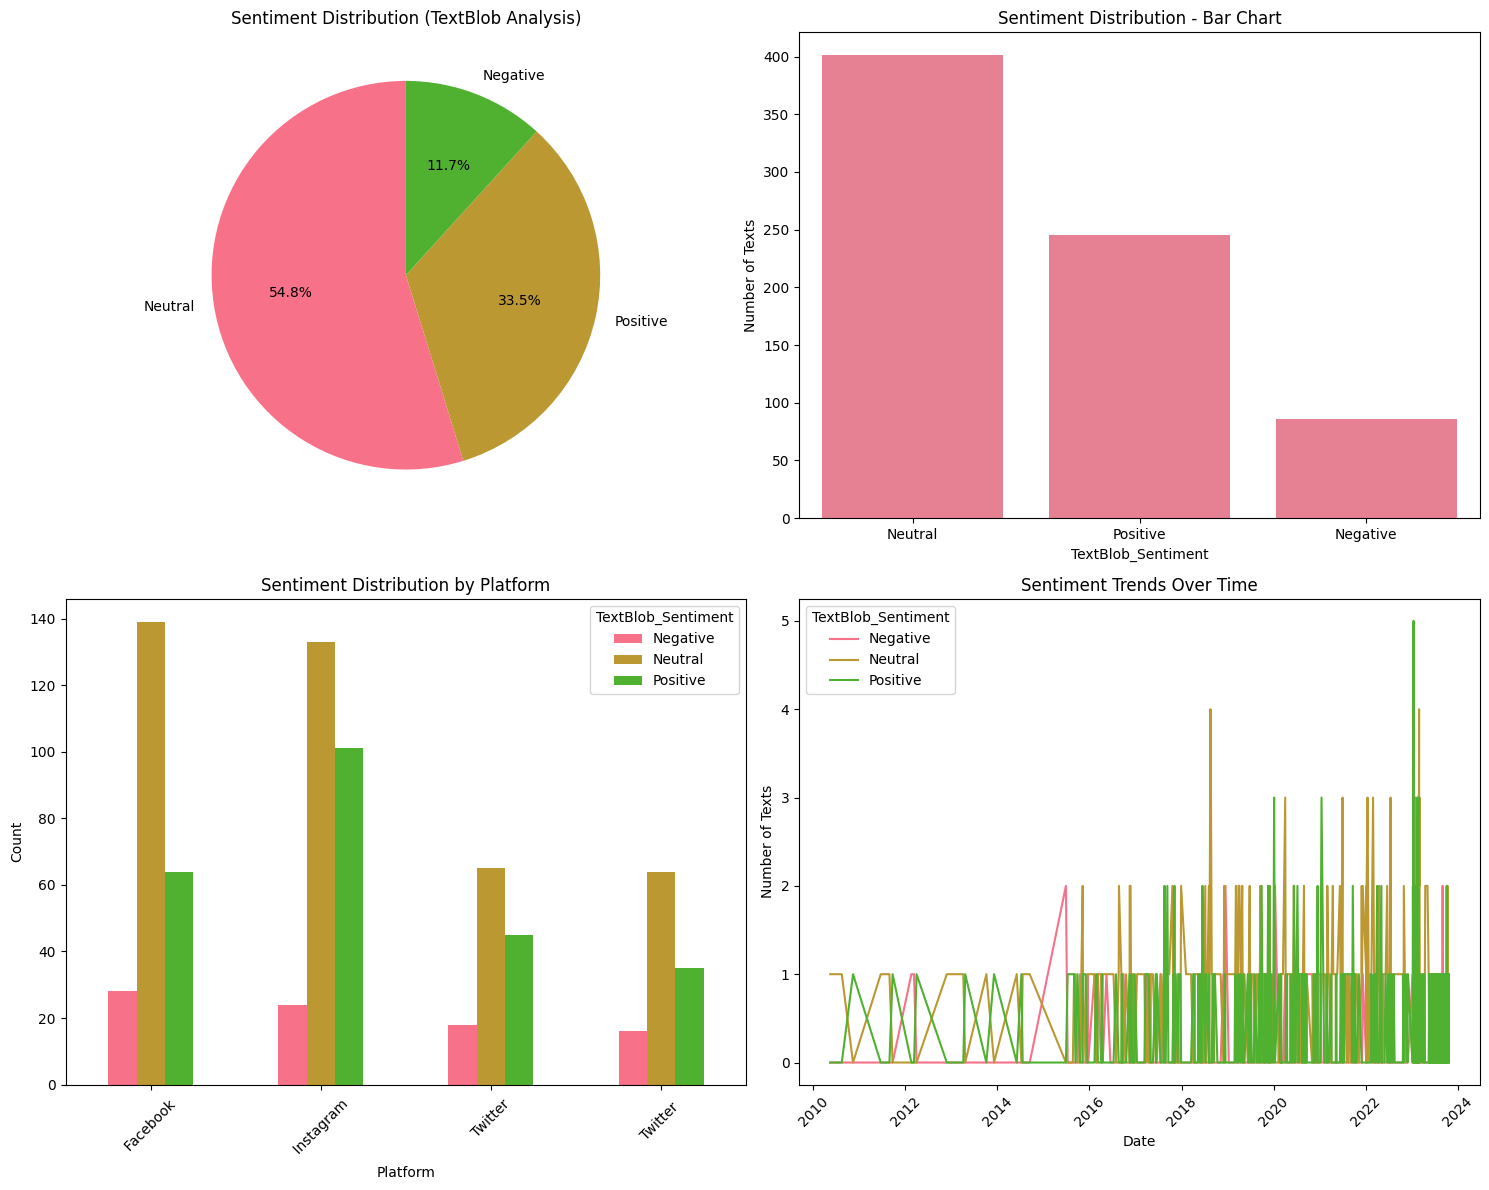

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Sentiment distribution (TextBlob)
sentiment_counts = df['TextBlob_Sentiment'].value_counts()
axes[0, 0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Sentiment Distribution (TextBlob Analysis)')

# Sentiment distribution bar chart
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Sentiment Distribution - Bar Chart')
axes[0, 1].set_ylabel('Number of Texts')

# Sentiment by Platform
if 'Platform' in df.columns:
    platform_sentiment = pd.crosstab(df['Platform'], df['TextBlob_Sentiment'])
    platform_sentiment.plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('Sentiment Distribution by Platform')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].tick_params(axis='x', rotation=45)

# Sentiment over time
if 'Timestamp' in df.columns:
    df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
    daily_sentiment = df.groupby(['Date', 'TextBlob_Sentiment']).size().unstack(fill_value=0)
    daily_sentiment.plot(ax=axes[1, 1])
    axes[1, 1].set_title('Sentiment Trends Over Time')
    axes[1, 1].set_ylabel('Number of Texts')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('sentiment_distribution.png')
plt.show()

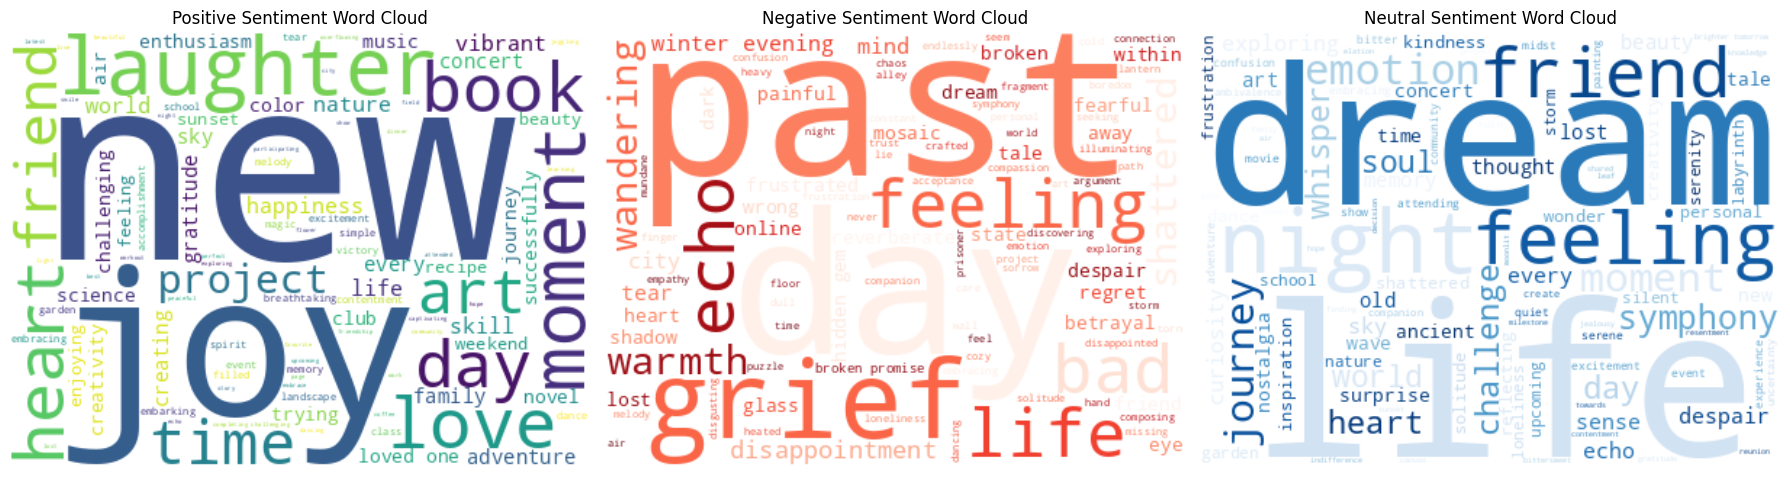

In [19]:
# Generate word clouds for each sentiment category
sentiments = ['Positive', 'Negative', 'Neutral']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, sentiment in enumerate(sentiments):
    text = ' '.join(df[df['TextBlob_Sentiment'] == sentiment]['Cleaned_Text'])

    if text.strip():
        wordcloud = WordCloud(
            width=400,
            height=300,
            background_color='white',
            max_words=100,
            colormap='viridis' if sentiment == 'Positive' else 'Reds' if sentiment == 'Negative' else 'Blues'
        ).generate(text)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'{sentiment} Sentiment Word Cloud')
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f'No {sentiment} texts',
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[i].transAxes)
        axes[i].axis('off')

plt.tight_layout()
plt.savefig('word_cloud.png')
plt.show()

## **Step 6**: Advanced Analysis on Most Frequent Words

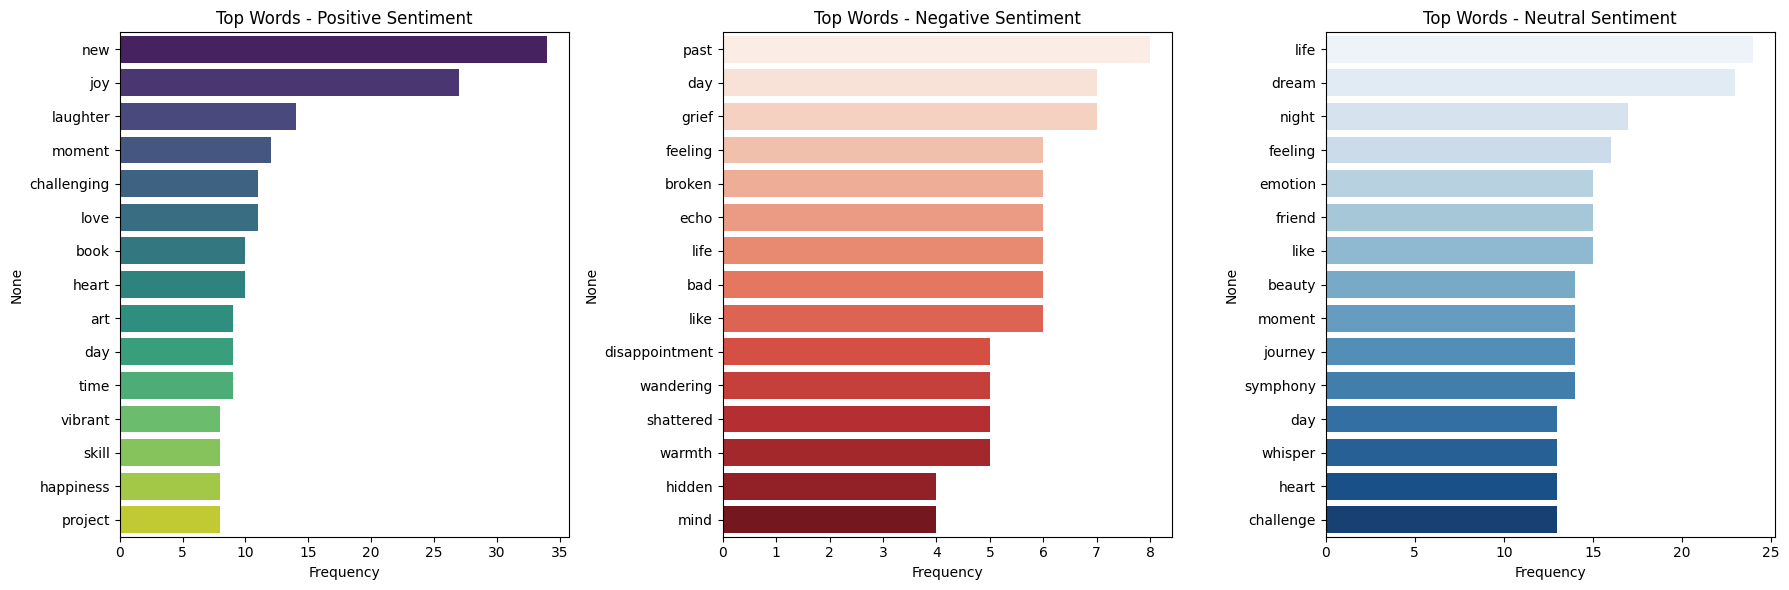

In [20]:
# Analyze most frequent words by sentiment
def get_top_words_by_sentiment(sentiment, top_n=15):
    """Get top N words for a specific sentiment"""
    sentiment_texts = df[df['TextBlob_Sentiment'] == sentiment]['Cleaned_Text']
    all_words = ' '.join(sentiment_texts).split()

    word_freq = pd.Series(all_words).value_counts().head(top_n)
    return word_freq

# Subplots for word frequency analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, sentiment in enumerate(sentiments):
    top_words = get_top_words_by_sentiment(sentiment)

    if not top_words.empty:
        sns.barplot(x=top_words.values, y=top_words.index, ax=axes[i],
                   palette='viridis' if sentiment == 'Positive' else 'Reds' if sentiment == 'Negative' else 'Blues')
        axes[i].set_title(f'Top Words - {sentiment} Sentiment')
        axes[i].set_xlabel('Frequency')
    else:
        axes[i].text(0.5, 0.5, f'No {sentiment} texts',
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[i].transAxes)

plt.tight_layout()
plt.savefig('top_words.png')
plt.show()

## **Step 7**: Additional Insights

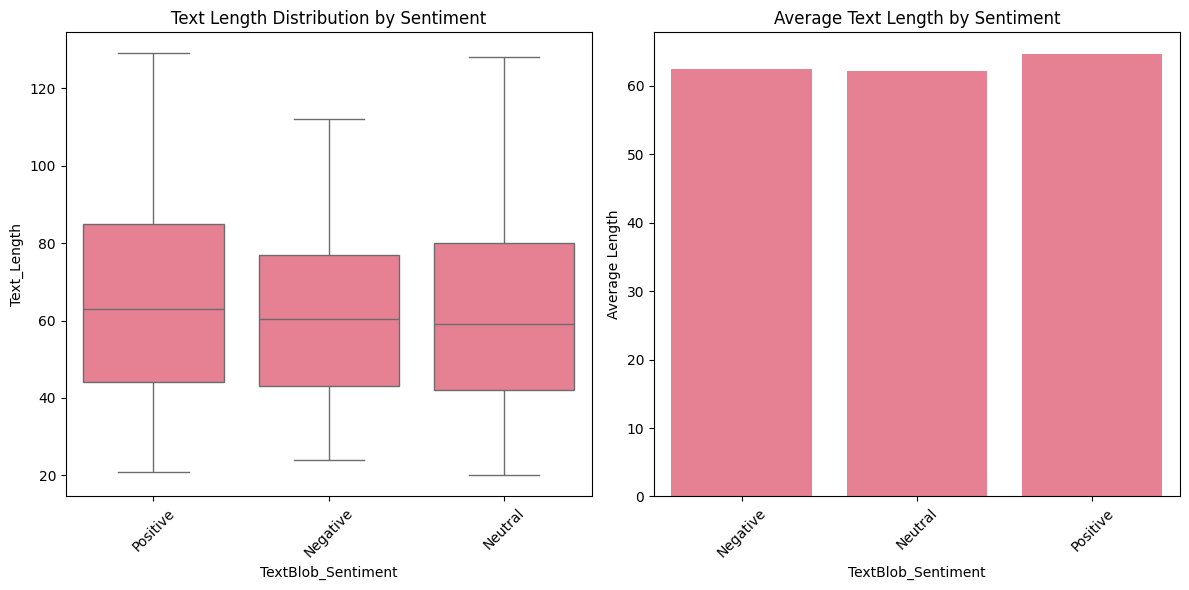


Average Text Length by Sentiment:
TextBlob_Sentiment
Negative    62.430233
Neutral     62.224439
Positive    64.583673
Name: Text_Length, dtype: float64


In [21]:
# Text length analysis by sentiment
df['Text_Length'] = df['Cleaned_Text'].str.len()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='TextBlob_Sentiment', y='Text_Length')
plt.title('Text Length Distribution by Sentiment')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
avg_length = df.groupby('TextBlob_Sentiment')['Text_Length'].mean()
sns.barplot(x=avg_length.index, y=avg_length.values)
plt.title('Average Text Length by Sentiment')
plt.ylabel('Average Length')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nAverage Text Length by Sentiment:")
print(avg_length)

## **Step 8**: Summary Statistics

In [22]:
# Comprehensive summary
print("="*50)
print("SENTIMENT ANALYSIS SUMMARY")
print("="*50)

print(f"Total texts analyzed: {len(df)}")
print(f"Positive texts: {len(df[df['TextBlob_Sentiment'] == 'Positive'])} ({(len(df[df['TextBlob_Sentiment'] == 'Positive'])/len(df))*100:.1f}%)")
print(f"Negative texts: {len(df[df['TextBlob_Sentiment'] == 'Negative'])} ({(len(df[df['TextBlob_Sentiment'] == 'Negative'])/len(df))*100:.1f}%)")
print(f"Neutral texts: {len(df[df['TextBlob_Sentiment'] == 'Neutral'])} ({(len(df[df['TextBlob_Sentiment'] == 'Neutral'])/len(df))*100:.1f}%)")

# Platform analysis
if 'Platform' in df.columns:
    print(f"\nPlatforms analyzed: {df['Platform'].nunique()}")
    print("Top platforms by volume:")
    print(df['Platform'].value_counts().head())

# Temporal analysis
if 'Timestamp' in df.columns:
    df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
    print(f"\nMost active hour: {df['Hour'].mode().iloc[0]}:00")

print(f"\nAverage text length: {df['Text_Length'].mean():.1f} characters")
print(f"Shortest text: {df['Text_Length'].min()} characters")
print(f"Longest text: {df['Text_Length'].max()} characters")

SENTIMENT ANALYSIS SUMMARY
Total texts analyzed: 732
Positive texts: 245 (33.5%)
Negative texts: 86 (11.7%)
Neutral texts: 401 (54.8%)

Platforms analyzed: 4
Top platforms by volume:
Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

Most active hour: 14:00

Average text length: 63.0 characters
Shortest text: 20 characters
Longest text: 129 characters


## **Step 9**: Save Results

In [23]:
# Save results to a new CSV file
output_df = df[['Text', 'Cleaned_Text', 'TextBlob_Sentiment', 'Text_Length']]

additional_cols = ['Platform', 'Timestamp', 'User', 'Country']
for col in additional_cols:
    if col in df.columns:
        output_df[col] = df[col]

output_df.to_csv('sentiment_analysis_results.csv', index=False)
print("\nResults saved to 'sentiment_analysis_results.csv'")

# Sample of final results
print("\nSample of Final Results:")
print(output_df.head(10))


Results saved to 'sentiment_analysis_results.csv'

Sample of Final Results:
                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   
5   Feeling grateful for the little things in lif...   
6   Rainy days call for cozy blankets and hot coc...   
7   The new movie release is a must-watch!       ...   
8   Political discussions heating up on the timel...   
9   Missing summer vibes and beach days.         ...   

                            Cleaned_Text TextBlob_Sentiment  Text_Length  \
0            enjoying beautiful day park           Positive           27   
1               traffic terrible morning           Negative           24   
2               finished amazing workout           Positive           24   
3 